In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import chess
import chess.pgn

In [132]:
votes = pd.read_json('votes.json', orient='table')
games = pd.read_json('games.json', orient='table')
users = pd.read_json('users.json', orient='table')


In [133]:
votes


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
9354,9375,50,0,h2010107@nushigh.edu.sg,e4,True
9355,9376,50,0,h2010155@nushigh.edu.sg,e4,True
9356,9379,51,0,h2010094@nushigh.edu.sg,e4,True
9357,9378,51,0,h2010107@nushigh.edu.sg,e4,True


In [134]:
games

,white_team,winner,timeout
id,,,
1,1,2,True
2,2,-1,False
3,1,2,False
4,2,-1,False
5,1,1,False
6,2,1,False
7,1,1,False
8,2,2,False
9,1,2,False


In [135]:
users

,email,username,team
0,h1710074@nushigh.edu.sg,LAM JUN RONG,1
1,h1710051@nushigh.edu.sg,JAVIER LIM,1
2,h1810014@nushigh.edu.sg,CERVON WONG TENG HAO,1
3,h2010143@nushigh.edu.sg,"TAN YOU JUN, EUGENE",2
4,h1810136@nushigh.edu.sg,SEOW WEI RONG DANIEL,2
...,...,...,...
143,h2210002@nushigh.edu.sg,ADVITEEYA KRISHNA,1
144,h2210166@nushigh.edu.sg,YAP KIEN HONG (YE JIANFENG),2
145,h1710098@nushigh.edu.sg,"NAM POH CHUAN, CHARLES",2
146,h2210015@nushigh.edu.sg,"BOH TZE EN, BRAYAN",1


In [136]:
games6 = games.loc[:29]


In [137]:
games6


,white_team,winner,timeout
id,,,
1,1,2,True
2,2,-1,False
3,1,2,False
4,2,-1,False
5,1,1,False
6,2,1,False
7,1,1,False
8,2,2,False
9,1,2,False


In [138]:
votes6 = votes[votes.game_id.isin(games6.index.tolist())]
votes6


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
7855,7870,29,1,h1910089@nushigh.edu.sg,e5,True
7856,7874,29,2,h1710149@nushigh.edu.sg,Nf3,True
7857,7872,29,2,h2010094@nushigh.edu.sg,Nf3,True
7858,7871,29,2,h2010107@nushigh.edu.sg,Nf3,True


In [139]:
len(votes6) * 20 / 60 / 60


43.62777777777777

In [140]:
len(users)


148

In [141]:
len(users[users.email.isin(votes6.email)])


130

In [142]:
v6a = votes6[votes6.accepted]


def get_team(email):
    return users[users.email == email].team.iloc[0]


def get_name(email):
    return users[users.email == email].username.iloc[0]


def get_winner(game_id):
    return games.loc[game_id].winner


v6a.loc[:, 'team'] = v6a.email.apply(get_team)
v6a.loc[:, 'winner'] = v6a.game_id.apply(get_winner)

v6a

C:\Users\billi\AppData\Local\Temp\ipykernel_7372\2302466192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v6a.loc[:, 'team'] = v6a.email.apply(get_team)
C:\Users\billi\AppData\Local\Temp\ipykernel_7372\2302466192.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v6a.loc[:, 'winner'] = v6a.game_id.apply(get_winner)


,id,game_id,voting_round,email,vote,accepted,team,winner
0,1,1,0,h1810014@nushigh.edu.sg,d4,True,1,2
2,3,1,1,h1810136@nushigh.edu.sg,e5,True,2,2
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True,1,2
6,6,1,3,h1810136@nushigh.edu.sg,Bc5,True,2,2
7,8,1,4,h1810014@nushigh.edu.sg,Nf3,True,1,2
...,...,...,...,...,...,...,...,...
7855,7870,29,1,h1910089@nushigh.edu.sg,e5,True,1,2
7856,7874,29,2,h1710149@nushigh.edu.sg,Nf3,True,2,2
7857,7872,29,2,h2010094@nushigh.edu.sg,Nf3,True,2,2
7858,7871,29,2,h2010107@nushigh.edu.sg,Nf3,True,2,2


In [153]:
N = 3

top10 = set()

for j in range(1, 29):
    top = v6a[(v6a.team == v6a.winner) & (v6a.game_id <= j)].email.value_counts()
    [top10.add(x) for x in list(top.index)[:N]]

top10

{'h1710133@nushigh.edu.sg',
 'h1810136@nushigh.edu.sg',
 'h1810141@nushigh.edu.sg',
 'h1810152@nushigh.edu.sg',
 'h1910014@nushigh.edu.sg',
 'h1910070@nushigh.edu.sg',
 'h1910089@nushigh.edu.sg',
 'h1910115@nushigh.edu.sg',
 'h2010071@nushigh.edu.sg',
 'h2010143@nushigh.edu.sg',
 'h2010155@nushigh.edu.sg',
 'h2110092@nushigh.edu.sg'}

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.19607843e-01 2.79582593e-01 9.89980213e-01 1.00000000e+00]
 [1.39215686e-01 5.36866598e-01 9.60121645e-01 1.00000000e+00]
 [4.11764706e-02 7.51331890e-01 9.11022649e-01 1.00000000e+00]
 [2.29411765e-01 9.11022649e-01 8.40344072e-01 1.00000000e+00]
 [4.09803922e-01 9.89980213e-01 7.55382735e-01 1.00000000e+00]
 [5.90196078e-01 9.89980213e-01 6.55283850e-01 1.00000000e+00]
 [7.70588235e-01 9.11022649e-01 5.42053356e-01 1.00000000e+00]
 [9.58823529e-01 7.51331890e-01 4.12356317e-01 1.00000000e+00]
 [1.00000000e+00 5.36866598e-01 2.79582593e-01 1.00000000e+00]
 [1.00000000e+00 2.79582593e-01 1.41206152e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


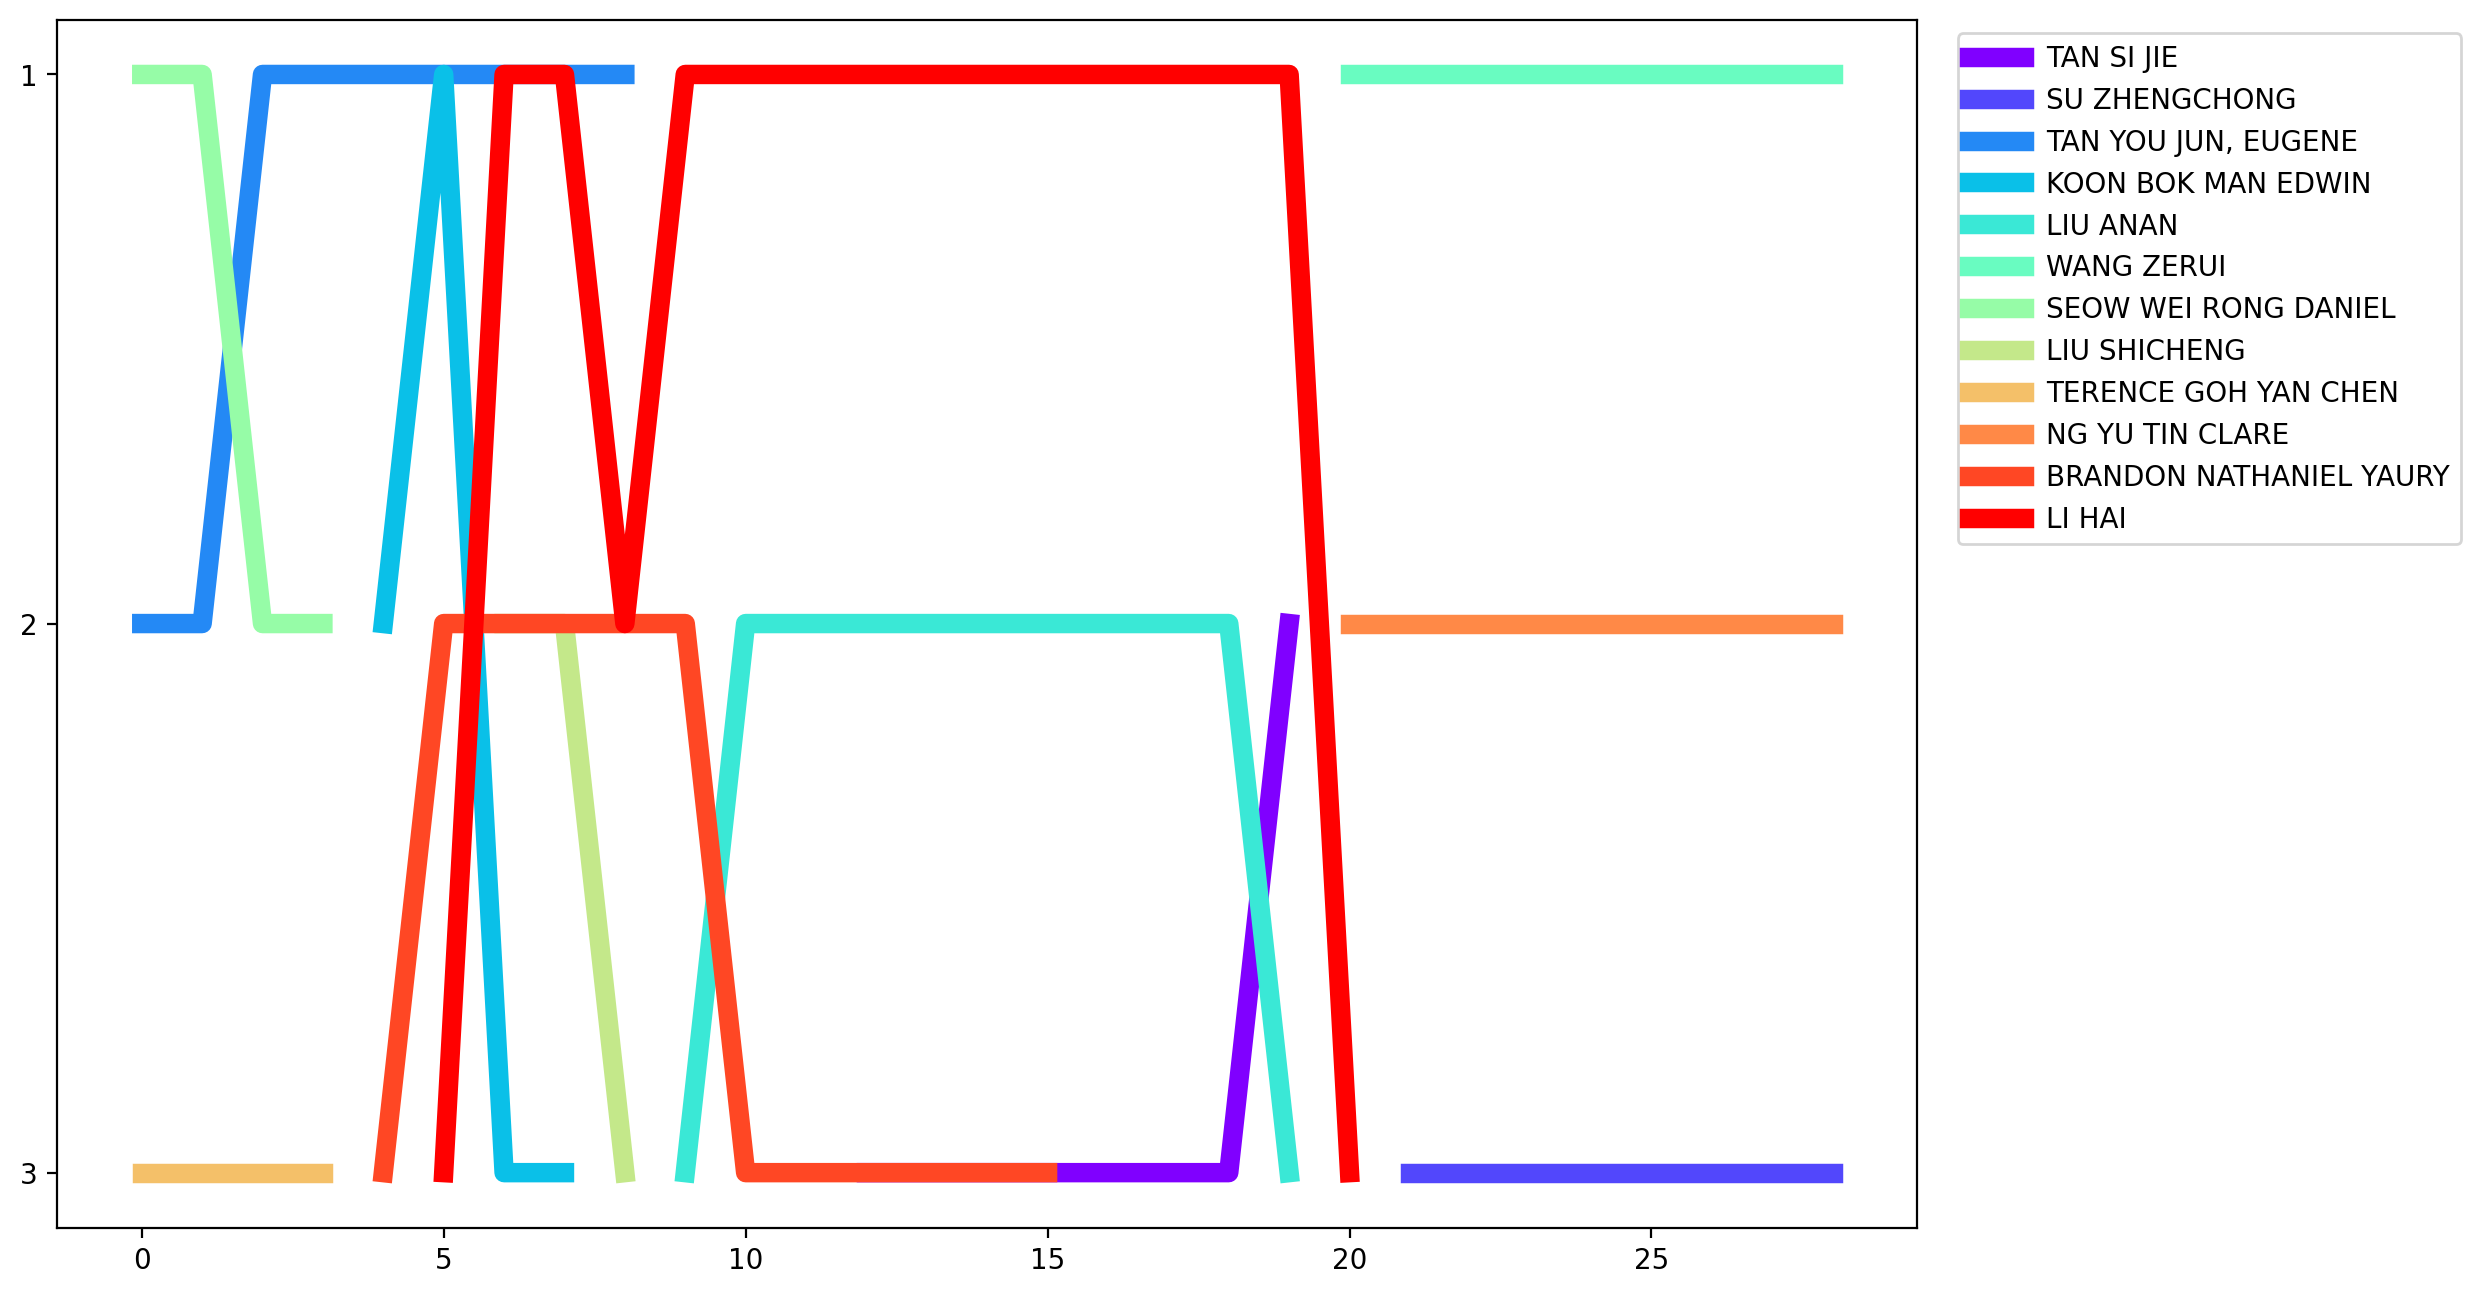

In [165]:
# given email, find list of their placings
def get_placings(email):
    lst = []
    for i in range(1, 30):
        curr_board = list(v6a[(v6a.team == v6a.winner) & (v6a.game_id <= i)].email.value_counts().index)
        if email in curr_board:
            placing = curr_board.index(email)
            lst.append(placing)
        else:
            lst.append(-1)
    return lst


def get_scores(email):
    lst = []
    for i in range(1, 30):
        curr_board = v6a[(v6a.team == v6a.winner) & (v6a.game_id <= i)].email.value_counts()
        if email in curr_board.index:
            lst.append(curr_board.loc[email])
        else:
            lst.append(0)
    return lst


plt.figure(figsize=(12, 8), dpi=200)
colors = cm.rainbow(np.linspace(0, 1, len(top10)))
print(colors)
df = pd.DataFrame()
for i, email in enumerate(top10):
    placings = [x if x < N else -1 for x in get_placings(email)]
    df[email] = placings

    x = []
    y = []

    for j, p in enumerate(placings):
        if p != -1:
            x.append(j)
            y.append(p + 1)
    line, = plt.plot(x, y, color=colors[i], linewidth=7)
    line.set_label(get_name(email))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.gca().invert_yaxis()
plt.gca().yaxis.get_major_locator().set_params(integer=True)

plt.savefig('placings.png', bbox_inches='tight', facecolor='white')

In [170]:
list(zip(enumerate(get_scores('h2010155@nushigh.edu.sg'), 1)))

[((1, 0),),
 ((2, 0),),
 ((3, 0),),
 ((4, 0),),
 ((5, 0),),
 ((6, 0),),
 ((7, 0),),
 ((8, 2),),
 ((9, 5),),
 ((10, 5),),
 ((11, 5),),
 ((12, 5),),
 ((13, 38),),
 ((14, 45),),
 ((15, 45),),
 ((16, 45),),
 ((17, 62),),
 ((18, 86),),
 ((19, 105),),
 ((20, 130),),
 ((21, 177),),
 ((22, 217),),
 ((23, 218),),
 ((24, 222),),
 ((25, 222),),
 ((26, 235),),
 ((27, 257),),
 ((28, 265),),
 ((29, 267),)]

In [16]:
list(enumerate(top10))

[(0, 'h1710133@nushigh.edu.sg'),
 (1, 'h1810141@nushigh.edu.sg'),
 (2, 'h2010143@nushigh.edu.sg'),
 (3, 'h1910070@nushigh.edu.sg'),
 (4, 'h1910089@nushigh.edu.sg'),
 (5, 'h2010155@nushigh.edu.sg'),
 (6, 'h1810136@nushigh.edu.sg'),
 (7, 'h2110092@nushigh.edu.sg'),
 (8, 'h1810152@nushigh.edu.sg'),
 (9, 'h1910115@nushigh.edu.sg'),
 (10, 'h1910014@nushigh.edu.sg'),
 (11, 'h2010071@nushigh.edu.sg')]

In [17]:
list(v6a[(v6a.team == v6a.winner)].email.value_counts().index).index('h2010155@nushigh.edu.sg')


0

In [18]:
v6a[(v6a.team == v6a.winner)].email.value_counts()


h2010155@nushigh.edu.sg    267
h1910115@nushigh.edu.sg    209
h1810141@nushigh.edu.sg    203
h2010071@nushigh.edu.sg    163
h1710133@nushigh.edu.sg    157
                          ... 
h1710126@nushigh.edu.sg      1
h1930013@nushigh.edu.sg      1
h1910154@nushigh.edu.sg      1
h1910010@nushigh.edu.sg      1
h2110040@nushigh.edu.sg      1
Name: email, Length: 75, dtype: int64

In [122]:
games6


,white_team,winner,timeout
id,,,
1,1,2,True
2,2,-1,False
3,1,2,False
4,2,-1,False
5,1,1,False
6,2,1,False
7,1,1,False
8,2,2,False
9,1,2,False


In [20]:
votes6


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
7855,7870,29,1,h1910089@nushigh.edu.sg,e5,True
7856,7874,29,2,h1710149@nushigh.edu.sg,Nf3,True
7857,7872,29,2,h2010094@nushigh.edu.sg,Nf3,True
7858,7871,29,2,h2010107@nushigh.edu.sg,Nf3,True


In [50]:
gamesMoves = votes6[votes6.accepted].groupby(['game_id', 'voting_round']).first().vote.groupby('game_id').apply(list)
gamesMoves

game_id
1     [d4, e5, dxe5, Bc5, Nf3, d6, exd6, Ne7, Nc3, c...
2     [e4, c6, Nf3, d5, exd5, cxd5, Nc3, Nf6, d4, g6...
3     [e4, c5, Nf3, Nc6, d4, cxd4, Nxd4, e5, Nxc6, b...
4     [e4, e5, Ke2, Ke7, Ke1, Ke8, Ke2, Ke7, Ke1, Ke...
5     [e4, e5, Nf3, Nc6, Bc4, Bc5, O-O, Nf6, Nc3, O-...
6     [e4, e5, Nf3, Nc6, Bc4, Bc5, b4, Bxb4, c3, Bc5...
7     [e4, c5, Nf3, Nc6, Bc4, e6, d4, cxd4, Nxd4, Qb...
8     [e4, e5, Nf3, Nc6, d4, exd4, Nxd4, Nxd4, Qxd4,...
9     [e4, e5, Nf3, Nc6, Bc4, Nf6, Nc3, Bc5, O-O, O-...
10    [e4, e5, Nf3, Nc6, Bb5, Bc5, Bxc6, dxc6, Nxe5,...
11    [e4, e5, Nf3, Nc6, Bc4, Nf6, Nc3, h6, O-O, Bc5...
12    [e4, e5, Nf3, Nc6, Bb5, a6, Ba4, b5, Bb3, Nf6,...
13    [e4, c5, Nf3, d6, Nc3, a6, d4, cxd4, Qxd4, e6,...
14    [e4, e5, Nf3, Nc6, Bc4, Nd4, Nxd4, exd4, c3, d...
15    [e4, e5, Nf3, Nc6, Bc4, Bc5, Nc3, Nf6, d3, h6,...
16    [e4, e5, Nf3, Nc6, Bc4, Nf6, Nc3, Bc5, O-O, d6...
17    [e4, e5, Nf3, Nc6, Bb5, a6, Ba4, b5, Bb3, Nf6,...
18    [e4, e5, Nf3, Nc6, Bc4, Bc5, Nc3, 

In [171]:
pgnGames = []

for i, gameMoves in gamesMoves.iteritems():
    board = chess.Board()
    game = chess.pgn.Game()

    metadata = games6.loc[i]

    game.headers['Event'] = 'NUSH Chess'
    game.headers['Site'] = 'chess.nush.app'
    game.headers['Date'] = '2022.11.10'
    game.headers['Round'] = str(i)

    if metadata.white_team == 1:
        game.headers['White'] = 'Team A'
        game.headers['Black'] = 'Team Z'
    else:
        game.headers['Black'] = 'Team A'
        game.headers['White'] = 'Team Z'

    if metadata.white_team == metadata.winner:
        game.headers['Result'] = '1-0'
    elif metadata.winner == -1:
        game.headers['Result'] = '1/2-1/2'
    else:
        game.headers['Result'] = '0-1'

    if metadata.timeout:
        game.headers['Termination'] = 'time forfeit'
    else:
        game.headers['Termination'] = 'normal'

    node = None
    for j, san in enumerate(gameMoves):
        move = board.parse_san(san)
        board.push(move)
        if j == 0:
            node = game.add_main_variation(move)
        else:
            node = node.add_main_variation(move)

    pgnGames.append(game)

with open('nush-chess.pgn', 'w') as file:
    for i in range(len(pgnGames)):
        print(pgnGames[i], file=file, end='\n\n')

pgnGames

[<Game at 0x2696e1b39d0 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26971d232b0 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x2696e18c5e0 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x2696ec03eb0 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x2696e201330 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26962721f00 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x26971e44760 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26971e46f20 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x26963447d00 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x269634459f0 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x26971e67d00 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26971e67c40 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x26971dc3ee0 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26971dc10f0 ('Team Z' vs. 'Team A', '2022.11.10')>,
 <Game at 0x26971e90e20 ('Team A' vs. 'Team Z', '2022.11.10')>,
 <Game at 0x26971ea22c0 ('Team A' vs. 'T

In [155]:
get_placings('h2010155@nushigh.edu.sg')


[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 43,
 33,
 38,
 40,
 40,
 14,
 11,
 11,
 11,
 9,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [182]:
games17 = games.loc[:17].copy()
votes17 = votes[votes.game_id.isin(games17.index.tolist())].copy()
votes17


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
5877,5842,17,80,h1710091@nushigh.edu.sg,e8=Q#,True
5878,5845,17,80,h1710149@nushigh.edu.sg,e8=Q#,True
5879,5844,17,80,h1810136@nushigh.edu.sg,e8=Q#,True
5880,5843,17,80,h1810141@nushigh.edu.sg,e8=Q#,True


In [183]:
votes17.groupby('game_id').email.unique().apply(len)

game_id
1      8
2     11
3     17
4     22
5     40
6     39
7     37
8     35
9     36
10    28
11    17
12    17
13    11
14     8
15    10
16    21
17    21
Name: email, dtype: int64

In [187]:
votes17['is_white'] = votes17.voting_round % 2 == 0
votes17

,id,game_id,voting_round,email,vote,accepted,is_white
0,1,1,0,h1810014@nushigh.edu.sg,d4,True,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True,False
3,5,1,2,h1930005@nushigh.edu.sg,d5,False,True
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True,True
...,...,...,...,...,...,...,...
5877,5842,17,80,h1710091@nushigh.edu.sg,e8=Q#,True,True
5878,5845,17,80,h1710149@nushigh.edu.sg,e8=Q#,True,True
5879,5844,17,80,h1810136@nushigh.edu.sg,e8=Q#,True,True
5880,5843,17,80,h1810141@nushigh.edu.sg,e8=Q#,True,True


In [198]:
grp = votes17.groupby(['game_id', 'is_white']).email.count().reset_index()
grp

,game_id,is_white,email
0,1,False,52
1,1,True,35
2,2,False,61
3,2,True,95
4,3,False,44
5,3,True,73
6,4,False,51
7,4,True,53
8,5,False,206
9,5,True,234


In [291]:
voteDiff = (grp[grp.is_white].email.reset_index(drop=True) - grp[~grp.is_white].email.reset_index(drop=True)) / grp.groupby('game_id').email.sum().reset_index(drop=True)
# voteDiff = ((grp[grp.is_white].email.reset_index(drop=True) - grp[~grp.is_white].email.reset_index(drop=True)) > 0).astype(int)
voteDiff.rename('vote-diff', inplace=True)
voteDiff

0    -0.195402
1     0.217949
2     0.247863
3     0.019231
4     0.063636
5    -0.245675
6     0.249267
7     0.186486
8    -0.158433
9    -0.068814
10    0.208163
11   -0.112000
12    0.000000
13   -0.280000
14    0.345196
15    0.211314
16   -0.154472
Name: vote-diff, dtype: float64

In [292]:
def encode(x):
    if x.winner == -1:
        return 0
    elif x.white_team == x.winner:
        return 1
    else:
        return -1


winEncoded = games17.apply(encode, axis=1)
winEncoded.rename('result', inplace=True).reset_index(drop=True, inplace=True)
winEncoded

0    -1
1     0
2    -1
3     0
4     1
5    -1
6     1
7     1
8    -1
9    -1
10    1
11   -1
12   -1
13    1
14    1
15    0
16    1
Name: result, dtype: int64

In [293]:
pd.concat([voteDiff, winEncoded], axis=1)

,vote-diff,result
0,-0.195402,-1
1,0.217949,0
2,0.247863,-1
3,0.019231,0
4,0.063636,1
5,-0.245675,-1
6,0.249267,1
7,0.186486,1
8,-0.158433,-1
9,-0.068814,-1


Correlation: 0.39479916751950966 p-value: 0.1301883655624164


<AxesSubplot:xlabel='vote-diff', ylabel='result'>

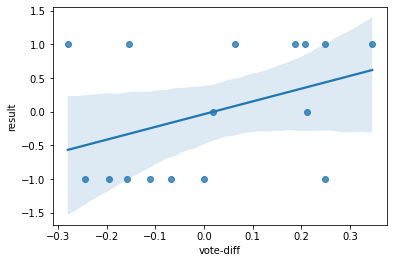

In [295]:
from scipy.stats import pearsonr, chi2_contingency

dropping = [1]
vdDrop = voteDiff.drop(dropping)
weDrop = winEncoded.drop(dropping)

corr, p = pearsonr(vdDrop, weDrop)
print('Correlation:', corr, 'p-value:', p)
sns.regplot(x=vdDrop, y=weDrop)


In [286]:
contigency = pd.crosstab(vdDrop, weDrop)
contigency

result,-1,1
vote-diff,,
0,6,2
1,1,5


In [287]:
c, p, dof, expected = chi2_contingency(contigency)
p


0.10519250512004134